In [16]:
import lyricsgenius
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import sys
import time

# --- 1. SETUP ---
GENIUS_ACCESS_TOKEN = "IKoqZN1ANyU_2G6zmTPF2xlaH2OlIEEUlDoD97Mo9-P_A6-2QgnSoQlwsJ3Hy3DY"

if "YOUR_GENIUS" in GENIUS_ACCESS_TOKEN:
    print("ERROR: Please paste your Genius Access Token into the script.")
    sys.exit()

print("Initializing Genius API...")
genius = lyricsgenius.Genius(
    GENIUS_ACCESS_TOKEN,
    remove_section_headers=True,
    excluded_terms=["(Live)", "(Remix)", "Demo"],
    timeout=15,
    retries=3
)

# --- 2. FIND THE ARTIST ---
artist_name = "Taylor Swift"
songs_to_process_count = 30
print(f"Searching for artist '{artist_name}' and fetching up to {songs_to_process_count} songs...")
try:
    artist = genius.search_artist(artist_name, max_songs=songs_to_process_count, sort="release_date")
    print(f"Successfully found artist: {artist.name}")
except Exception as e:
    print(f"An error occurred while searching for the artist: {e}")
    sys.exit()

# --- 3. PROCESS SONGS ---
print(f"\nProcessing {len(artist.songs)} songs found...")
song_sentiments = []

for song in artist.songs:
    if not song or not song.lyrics:
        continue

    lyrics = song.lyrics.strip()
    if len(lyrics.split()) < 20:  # skip too-short or instrumental tracks
        continue

    print(f"  Processing: '{song.title}'")

    sentiment = TextBlob(lyrics).sentiment.polarity

    release_year = None
    if hasattr(song, 'year') and song.year:
        try:
            release_year = int(str(song.year)[:4])
        except (ValueError, TypeError):
            pass
    elif hasattr(song, 'release_date_components') and song.release_date_components:
        release_year = song.release_date_components.get('year')

    song_sentiments.append({
        'album': song.album if song.album else "Unknown Album",
        'title': song.title,
        'year': release_year if release_year else 0,
        'sentiment': sentiment
    })

df = pd.DataFrame(song_sentiments)

# --- 4. VISUALIZE ---
if df.empty:
    print("\nNo valid songs with lyrics found — nothing to plot.")
    sys.exit()

print("\n--- SUMMARY ---")
print(f"Songs processed: {len(df)}")
print(df.head())

# Use album if available, otherwise plot per song
has_album_data = df['album'].nunique() > 1 and df['album'].notna().any()

plt.figure(figsize=(15, 8))

if has_album_data:
    # group by album
    df['album'] = df['album'].fillna("Unknown Album")
    plot_data = df.groupby('album')['sentiment'].mean().sort_values(ascending=False)
    plot_data.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'{artist.name} – Average Sentiment per Album', fontsize=16)
    plt.xlabel('Album', fontsize=12)
else:
    # fallback: per song
    df_sorted = df.sort_values(by='sentiment', ascending=False)
    plt.bar(df_sorted['title'], df_sorted['sentiment'], color='skyblue', edgecolor='black')
    plt.xticks(rotation=90, ha='right')
    plt.title(f'{artist.name} – Sentiment per Song', fontsize=16)
    plt.xlabel('Song', fontsize=12)

plt.ylabel('Sentiment (Negative < 0 > Positive)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Initializing Genius API...
Searching for artist 'Taylor Swift' and fetching up to 30 songs...
Searching for songs by Taylor Swift...

Song 1: "Won’t Let It Happen"
Song 2: "Thirteen"
Song 3: "Echoes in the Autumn Rain"
"The Fate of Ophelia (Instrumental)" is not valid. Skipping.
Couldn't find the lyrics section. Please report this if the song has lyrics.
Song URL: https://genius.com/Taylor-swift-the-fate-of-ophelia-alone-in-my-tower-acoustic-version-instrumental-lyrics
Song 4: "The Fate of Ophelia (Alone In My Tower Acoustic Version / Instrumental)"
Song 5: "Wood (Original Songwriting Voice Memo)"
Song 6: "Ruin The Friendship (Original Songwriting Voice Memo)"
Song 7: "Eldest Daughter (Original Songwriting Voice Memo)"
Song 8: "Honey (Original Songwriting Voice Memo)"
Song 9: "CANCELLED! (Original Songwriting Voice Memo)"
Song 10: "The Fate of Ophelia (Original Songwriting Voice Memo)"
Song 11: "Father Figure (Original Songwriting Voice Memo)"
Song 12: "Eldest Daughter (Now You’re Home

TypeError: unhashable type: 'dict'

In [14]:
%tb

SystemExit: 

In [17]:
import lyricsgenius
from textblob import TextBlob
import sys
import re

# --- 1. SETUP ---
# Paste your Genius API Client Access Token here


# Check if the token has been added
if "YOUR_GENIUS" in GENIUS_ACCESS_TOKEN:
    print("ERROR: Please paste your Genius Access Token into the script.")
    sys.exit()

# Initialize the Genius API client
print("Initializing Genius API...")
try:
    genius = lyricsgenius.Genius(GENIUS_ACCESS_TOKEN,
                                 remove_section_headers=True, # This cleans up [Verse], etc.
                                 timeout=15, 
                                 retries=3)
except Exception as e:
    print(f"Failed to initialize the Genius API: {e}")
    sys.exit()


# --- 2. DEFINE SONGS TO ANALYZE ---
# A small, specific list of songs to test the core functionality.
songs_to_analyze = [
    {"title": "Cruel Summer", "artist": "Taylor Swift"},
    {"title": "All Too Well", "artist": "Taylor Swift"},
    {"title": "Shake It Off", "artist": "Taylor Swift"},
    {"title": "cardigan", "artist": "Taylor Swift"}
]

print("\n--- Starting Sentiment Analysis for Specific Songs ---")

# --- 3. LOOP, FETCH, AND ANALYZE ---
for song_info in songs_to_analyze:
    song_title = song_info["title"]
    artist_name = song_info["artist"]
    
    print(f"\nSearching for '{song_title}' by {artist_name}...")
    
    try:
        # The search_song() method is the most direct way to get a single song
        song = genius.search_song(song_title, artist_name)
        
        if song and song.lyrics:
            # Clean the lyrics just in case
            lyrics = re.sub(r'\d*Embed$', '', song.lyrics).strip()
            
            # Use TextBlob to calculate sentiment
            sentiment = TextBlob(lyrics).sentiment.polarity
            
            # Print the result in a clean format
            print(f"  > SUCCESS: Found lyrics.")
            print(f"  > Sentiment Score: {sentiment:.4f}") # Format to 4 decimal places
            
            # Give context to the score
            if sentiment > 0.1:
                print("  > Interpretation: Generally Positive")
            elif sentiment < -0.1:
                print("  > Interpretation: Generally Negative")
            else:
                print("  > Interpretation: Generally Neutral")
                
        else:
            print(f"  > FAILED: Could not find lyrics for '{song_title}'.")

    except Exception as e:
        print(f"  > ERROR: An exception occurred while searching for '{song_title}': {e}")

print("\n--- Analysis Complete ---")

Initializing Genius API...

--- Starting Sentiment Analysis for Specific Songs ---

Searching for 'Cruel Summer' by Taylor Swift...
Searching for "Cruel Summer" by Taylor Swift...
Done.
  > SUCCESS: Found lyrics.
  > Sentiment Score: -0.1050
  > Interpretation: Generally Negative

Searching for 'All Too Well' by Taylor Swift...
Searching for "All Too Well" by Taylor Swift...
Done.
  > SUCCESS: Found lyrics.
  > Sentiment Score: 0.0669
  > Interpretation: Generally Neutral

Searching for 'Shake It Off' by Taylor Swift...
Searching for "Shake It Off" by Taylor Swift...
Done.
  > SUCCESS: Found lyrics.
  > Sentiment Score: -0.4657
  > Interpretation: Generally Negative

Searching for 'cardigan' by Taylor Swift...
Searching for "cardigan" by Taylor Swift...
Done.
  > SUCCESS: Found lyrics.
  > Sentiment Score: 0.1284
  > Interpretation: Generally Positive

--- Analysis Complete ---


Initializing Genius API...

--- Starting Analysis ---
This will analyze 200 songs and will take several minutes.

--- Analyzing Year: 2005 ---
Searching for 'We Belong Together' by Mariah Carey...
Searching for "We Belong Together" by Mariah Carey...
Done.
  > Success! Sentiment: 0.0096
Searching for 'Hollaback Girl' by Gwen Stefani...
Searching for "Hollaback Girl" by Gwen Stefani...
Done.
  > Success! Sentiment: -0.1566
Searching for 'Let Me Love You' by Mario...
Searching for "Let Me Love You" by Mario...
Done.
  > Success! Sentiment: 0.4291
Searching for 'Since U Been Gone' by Kelly Clarkson...
Searching for "Since U Been Gone" by Kelly Clarkson...
Done.
  > Success! Sentiment: 0.1571
Searching for '1, 2 Step' by Ciara...
Searching for "1, 2 Step" by Ciara...
Done.
  > Success! Sentiment: 0.2313
Searching for 'Gold Digger' by Kanye West...
Searching for "Gold Digger" by Kanye West...
Done.
  > Success! Sentiment: -0.0254
Searching for 'Boulevard of Broken Dreams' by Green Day...
Se

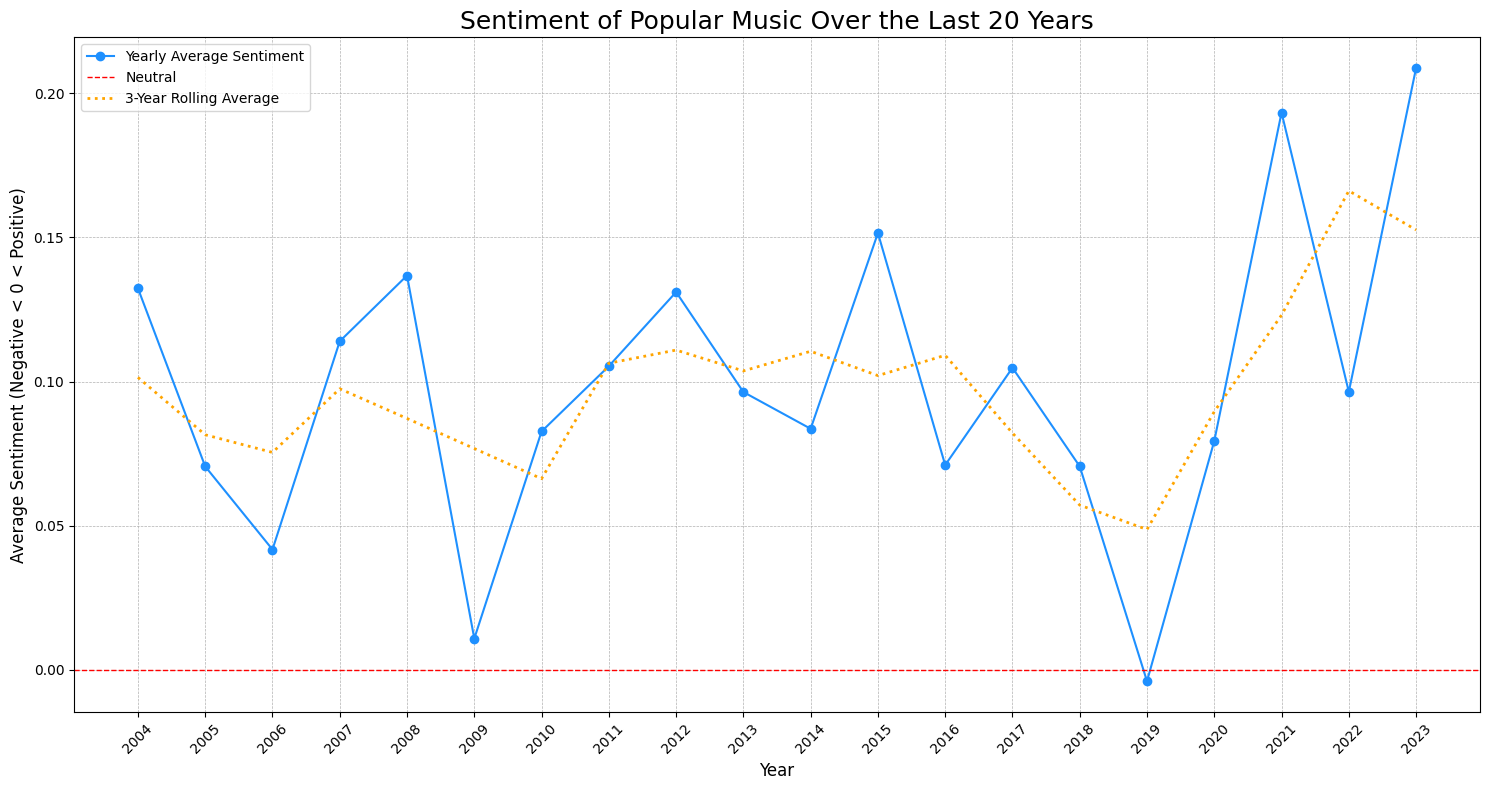

In [19]:
import lyricsgenius
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import re
import sys
import time
from datetime import datetime

# --- 1. SETUP ---
# Paste your Genius API Client Access Token here
# GENIUS_ACCESS_TOKEN = "YOUR_GENIUS_CLIENT_ACCESS_TOKEN_HERE"

# Check if the token has been added
if "YOUR_GENIUS" in GENIUS_ACCESS_TOKEN:
    print("ERROR: Please paste your Genius Access Token into the script.")
    sys.exit()

# Initialize the Genius API client
print("Initializing Genius API...")
try:
    genius = lyricsgenius.Genius(GENIUS_ACCESS_TOKEN,
                                 remove_section_headers=True,
                                 timeout=15,
                                 retries=3)
except Exception as e:
    print(f"Failed to initialize the Genius API: {e}")
    sys.exit()


# --- 2. EXPANDED LIST OF POPULAR SONGS ---
# A much larger, representative sample of major hits from the last 20 years.
current_year = datetime.now().year
yearly_hits = {
    year: [] for year in range(current_year - 20, current_year)
}

# Data curated from Billboard Year-End Hot 100 charts
yearly_hits[2023] = [{'title': 'Last Night', 'artist': 'Morgan Wallen'}, {'title': 'Flowers', 'artist': 'Miley Cyrus'}, {'title': 'Kill Bill', 'artist': 'SZA'}, {'title': 'Anti-Hero', 'artist': 'Taylor Swift'}, {'title': 'Creepin', 'artist': 'Metro Boomin'}, {'title': 'Calm Down', 'artist': 'Rema'}, {'title': 'Die for You', 'artist': 'The Weeknd'}, {'title': 'Fast Car', 'artist': 'Luke Combs'}, {'title': 'Snooze', 'artist': 'SZA'}, {'title': 'I\'m Good (Blue)', 'artist': 'David Guetta'}]
yearly_hits[2022] = [{'title': 'Heat Waves', 'artist': 'Glass Animals'}, {'title': 'As It Was', 'artist': 'Harry Styles'}, {'title': 'Stay', 'artist': 'The Kid Laroi'}, {'title': 'Easy on Me', 'artist': 'Adele'}, {'title': 'Shivers', 'artist': 'Ed Sheeran'}, {'title': 'First Class', 'artist': 'Jack Harlow'}, {'title': 'About Damn Time', 'artist': 'Lizzo'}, {'title': 'Bad Habit', 'artist': 'Steve Lacy'}, {'title': 'Cold Heart (Pnau remix)', 'artist': 'Elton John'}, {'title': 'Wait for U', 'artist': 'Future'}]
yearly_hits[2021] = [{'title': 'Levitating', 'artist': 'Dua Lipa'}, {'title': 'Save Your Tears', 'artist': 'The Weeknd'}, {'title': 'Blinding Lights', 'artist': 'The Weeknd'}, {'title': 'Mood', 'artist': '24kGoldn'}, {'title': 'good 4 u', 'artist': 'Olivia Rodrigo'}, {'title': 'Kiss Me More', 'artist': 'Doja Cat'}, {'title': 'Leave the Door Open', 'artist': 'Silk Sonic'}, {'title': 'drivers license', 'artist': 'Olivia Rodrigo'}, {'title': 'Montero (Call Me by Your Name)', 'artist': 'Lil Nas X'}, {'title': 'Peaches', 'artist': 'Justin Bieber'}]
yearly_hits[2020] = [{'title': 'Blinding Lights', 'artist': 'The Weeknd'}, {'title': 'Circles', 'artist': 'Post Malone'}, {'title': 'The Box', 'artist': 'Roddy Ricch'}, {'title': 'Don\'t Start Now', 'artist': 'Dua Lipa'}, {'title': 'Rockstar', 'artist': 'DaBaby'}, {'title': 'Adore You', 'artist': 'Harry Styles'}, {'title': 'Life Is Good', 'artist': 'Future'}, {'title': 'Memories', 'artist': 'Maroon 5'}, {'title': 'The Bones', 'artist': 'Maren Morris'}, {'title': 'Someone You Loved', 'artist': 'Lewis Capaldi'}]
yearly_hits[2019] = [{'title': 'Old Town Road', 'artist': 'Lil Nas X'}, {'title': 'Sunflower', 'artist': 'Post Malone'}, {'title': 'Without Me', 'artist': 'Halsey'}, {'title': 'Bad Guy', 'artist': 'Billie Eilish'}, {'title': 'Wow.', 'artist': 'Post Malone'}, {'title': 'Happier', 'artist': 'Marshmello'}, {'title': '7 Rings', 'artist': 'Ariana Grande'}, {'title': 'Talk', 'artist': 'Khalid'}, {'title': 'Sicko Mode', 'artist': 'Travis Scott'}, {'title': 'Sucker', 'artist': 'Jonas Brothers'}]
yearly_hits[2018] = [{'title': 'God\'s Plan', 'artist': 'Drake'}, {'title': 'Perfect', 'artist': 'Ed Sheeran'}, {'title': 'Meant to Be', 'artist': 'Bebe Rexha'}, {'title': 'Havana', 'artist': 'Camila Cabello'}, {'title': 'Rockstar', 'artist': 'Post Malone'}, {'title': 'Psycho', 'artist': 'Post Malone'}, {'title': 'I Like It', 'artist': 'Cardi B'}, {'title': 'The Middle', 'artist': 'Zedd'}, {'title': 'In My Feelings', 'artist': 'Drake'}, {'title': 'Girls Like You', 'artist': 'Maroon 5'}]
yearly_hits[2017] = [{'title': 'Shape of You', 'artist': 'Ed Sheeran'}, {'title': 'Despacito', 'artist': 'Luis Fonsi'}, {'title': 'That\'s What I Like', 'artist': 'Bruno Mars'}, {'title': 'Humble.', 'artist': 'Kendrick Lamar'}, {'title': 'Something Just Like This', 'artist': 'The Chainsmokers'}, {'title': 'Bad and Boujee', 'artist': 'Migos'}, {'title': 'Closer', 'artist': 'The Chainsmokers'}, {'title': 'Body Like a Back Road', 'artist': 'Sam Hunt'}, {'title': 'Believer', 'artist': 'Imagine Dragons'}, {'title': 'Congratulations', 'artist': 'Post Malone'}]
yearly_hits[2016] = [{'title': 'Love Yourself', 'artist': 'Justin Bieber'}, {'title': 'Sorry', 'artist': 'Justin Bieber'}, {'title': 'One Dance', 'artist': 'Drake'}, {'title': 'Work', 'artist': 'Rihanna'}, {'title': 'Stressed Out', 'artist': 'Twenty One Pilots'}, {'title': 'Panda', 'artist': 'Desiigner'}, {'title': 'Hello', 'artist': 'Adele'}, {'title': 'Don\'t Let Me Down', 'artist': 'The Chainsmokers'}, {'title': 'Can\'t Stop the Feeling!', 'artist': 'Justin Timberlake'}, {'title': 'Cheap Thrills', 'artist': 'Sia'}]
yearly_hits[2015] = [{'title': 'Uptown Funk', 'artist': 'Mark Ronson'}, {'title': 'Thinking Out Loud', 'artist': 'Ed Sheeran'}, {'title': 'See You Again', 'artist': 'Wiz Khalifa'}, {'title': 'Trap Queen', 'artist': 'Fetty Wap'}, {'title': 'Sugar', 'artist': 'Maroon 5'}, {'title': 'Shut Up and Dance', 'artist': 'Walk the Moon'}, {'title': 'Blank Space', 'artist': 'Taylor Swift'}, {'title': 'Watch Me (Whip/Nae Nae)', 'artist': 'Silentó'}, {'title': 'Earned It', 'artist': 'The Weeknd'}, {'title': 'The Hills', 'artist': 'The Weeknd'}]
yearly_hits[2014] = [{'title': 'Happy', 'artist': 'Pharrell Williams'}, {'title': 'Dark Horse', 'artist': 'Katy Perry'}, {'title': 'All of Me', 'artist': 'John Legend'}, {'title': 'Fancy', 'artist': 'Iggy Azalea'}, {'title': 'Counting Stars', 'artist': 'OneRepublic'}, {'title': 'Talk Dirty', 'artist': 'Jason Derulo'}, {'title': 'Rude', 'artist': 'Magic!'}, {'title': 'All About That Bass', 'artist': 'Meghan Trainor'}, {'title': 'Problem', 'artist': 'Ariana Grande'}, {'title': 'Stay with Me', 'artist': 'Sam Smith'}]
yearly_hits[2013] = [{'title': 'Thrift Shop', 'artist': 'Macklemore & Ryan Lewis'}, {'title': 'Blurred Lines', 'artist': 'Robin Thicke'}, {'title': 'Radioactive', 'artist': 'Imagine Dragons'}, {'title': 'Harlem Shake', 'artist': 'Baauer'}, {'title': 'Can\'t Hold Us', 'artist': 'Macklemore & Ryan Lewis'}, {'title': 'Mirrors', 'artist': 'Justin Timberlake'}, {'title': 'Just Give Me a Reason', 'artist': 'Pink'}, {'title': 'When I Was Your Man', 'artist': 'Bruno Mars'}, {'title': 'Cruise', 'artist': 'Florida Georgia Line'}, {'title': 'Roar', 'artist': 'Katy Perry'}]
yearly_hits[2012] = [{'title': 'Somebody That I Used to Know', 'artist': 'Gotye'}, {'title': 'Call Me Maybe', 'artist': 'Carly Rae Jepsen'}, {'title': 'We Are Young', 'artist': 'Fun.'}, {'title': 'Payphone', 'artist': 'Maroon 5'}, {'title': 'Lights', 'artist': 'Ellie Goulding'}, {'title': 'Glad You Came', 'artist': 'The Wanted'}, {'title': 'Stronger (What Doesn\'t Kill You)', 'artist': 'Kelly Clarkson'}, {'title': 'We Found Love', 'artist': 'Rihanna'}, {'title': 'Starships', 'artist': 'Nicki Minaj'}, {'title': 'What Makes You Beautiful', 'artist': 'One Direction'}]
yearly_hits[2011] = [{'title': 'Rolling in the Deep', 'artist': 'Adele'}, {'title': 'Party Rock Anthem', 'artist': 'LMFAO'}, {'title': 'Firework', 'artist': 'Katy Perry'}, {'title': 'E.T.', 'artist': 'Katy Perry'}, {'title': 'Give Me Everything', 'artist': 'Pitbull'}, {'title': 'Grenade', 'artist': 'Bruno Mars'}, {'title': 'Super Bass', 'artist': 'Nicki Minaj'}, {'title': 'Moves like Jagger', 'artist': 'Maroon 5'}, {'title': 'Just Can\'t Get Enough', 'artist': 'The Black Eyed Peas'}, {'title': 'On the Floor', 'artist': 'Jennifer Lopez'}]
yearly_hits[2010] = [{'title': 'Tik Tok', 'artist': 'Kesha'}, {'title': 'Need You Now', 'artist': 'Lady A'}, {'title': 'Hey, Soul Sister', 'artist': 'Train'}, {'title': 'California Gurls', 'artist': 'Katy Perry'}, {'title': 'OMG', 'artist': 'Usher'}, {'title': 'Airplanes', 'artist': 'B.o.B'}, {'title': 'Love the Way You Lie', 'artist': 'Eminem'}, {'title': 'Bad Romance', 'artist': 'Lady Gaga'}, {'title': 'Dynamite', 'artist': 'Taio Cruz'}, {'title': 'Break Your Heart', 'artist': 'Taio Cruz'}]
yearly_hits[2009] = [{'title': 'Boom Boom Pow', 'artist': 'The Black Eyed Peas'}, {'title': 'Poker Face', 'artist': 'Lady Gaga'}, {'title': 'Just Dance', 'artist': 'Lady Gaga'}, {'title': 'I Gotta Feeling', 'artist': 'The Black Eyed Peas'}, {'title': 'Love Story', 'artist': 'Taylor Swift'}, {'title': 'Right Round', 'artist': 'Flo Rida'}, {'title': 'Single Ladies (Put a Ring on It)', 'artist': 'Beyoncé'}, {'title': 'Heartless', 'artist': 'Kanye West'}, {'title': 'Gives You Hell', 'artist': 'The All-American Rejects'}, {'title': 'You Belong with Me', 'artist': 'Taylor Swift'}]
yearly_hits[2008] = [{'title': 'Low', 'artist': 'Flo Rida'}, {'title': 'Bleeding Love', 'artist': 'Leona Lewis'}, {'title': 'No One', 'artist': 'Alicia Keys'}, {'title': 'Lollipop', 'artist': 'Lil Wayne'}, {'title': 'Apologize', 'artist': 'Timbaland'}, {'title': 'No Air', 'artist': 'Jordin Sparks'}, {'title': 'Love Song', 'artist': 'Sara Bareilles'}, {'title': 'Love in This Club', 'artist': 'Usher'}, {'title': 'With You', 'artist': 'Chris Brown'}, {'title': 'Forever', 'artist': 'Chris Brown'}]
yearly_hits[2007] = [{'title': 'Irreplaceable', 'artist': 'Beyoncé'}, {'title': 'Umbrella', 'artist': 'Rihanna'}, {'title': 'The Sweet Escape', 'artist': 'Gwen Stefani'}, {'title': 'Big Girls Don\'t Cry', 'artist': 'Fergie'}, {'title': 'Buy U a Drank (Shawty Snappin\')', 'artist': 'T-Pain'}, {'title': 'Before He Cheats', 'artist': 'Carrie Underwood'}, {'title': 'Hey There Delilah', 'artist': 'Plain White T\'s'}, {'title': 'I Wanna Love You', 'artist': 'Akon'}, {'title': 'Say It Right', 'artist': 'Nelly Furtado'}, {'title': 'Glamorous', 'artist': 'Fergie'}]
yearly_hits[2006] = [{'title': 'Bad Day', 'artist': 'Daniel Powter'}, {'title': 'Temperature', 'artist': 'Sean Paul'}, {'title': 'Promiscuous', 'artist': 'Nelly Furtado'}, {'title': 'You\'re Beautiful', 'artist': 'James Blunt'}, {'title': 'Hips Don\'t Lie', 'artist': 'Shakira'}, {'title': 'Unwritten', 'artist': 'Natasha Bedingfield'}, {'title': 'Crazy', 'artist': 'Gnarls Barkley'}, {'title': 'Ridin\'', 'artist': 'Chamillionaire'}, {'title': 'SexyBack', 'artist': 'Justin Timberlake'}, {'title': 'Check on It', 'artist': 'Beyoncé'}]
yearly_hits[2005] = [{'title': 'We Belong Together', 'artist': 'Mariah Carey'}, {'title': 'Hollaback Girl', 'artist': 'Gwen Stefani'}, {'title': 'Let Me Love You', 'artist': 'Mario'}, {'title': 'Since U Been Gone', 'artist': 'Kelly Clarkson'}, {'title': '1, 2 Step', 'artist': 'Ciara'}, {'title': 'Gold Digger', 'artist': 'Kanye West'}, {'title': 'Boulevard of Broken Dreams', 'artist': 'Green Day'}, {'title': 'Candy Shop', 'artist': '50 Cent'}, {'title': 'Don\'t Cha', 'artist': 'The Pussycat Dolls'}, {'title': 'Behind These Hazel Eyes', 'artist': 'Kelly Clarkson'}]
yearly_hits[2004] = [{'title': 'Yeah!', 'artist': 'Usher'}, {'title': 'Burn', 'artist': 'Usher'}, {'title': 'If I Ain\'t Got You', 'artist': 'Alicia Keys'}, {'title': 'This Love', 'artist': 'Maroon 5'}, {'title': 'The Way You Move', 'artist': 'OutKast'}, {'title': 'The Reason', 'artist': 'Hoobastank'}, {'title': 'I Don\'t Wanna Know', 'artist': 'Mario Winans'}, {'title': 'Hey Ya!', 'artist': 'OutKast'}, {'title': 'Goodies', 'artist': 'Ciara'}, {'title': 'Lean Back', 'artist': 'Terror Squad'}]


# --- 3. LOOP, FETCH, AND ANALYZE ---
all_results = []
print("\n--- Starting Analysis ---")
print(f"This will analyze {sum(len(v) for v in yearly_hits.values())} songs and will take several minutes.")
for year, songs in yearly_hits.items():
    if not songs: continue
    print(f"\n--- Analyzing Year: {year} ---")
    for song_info in songs:
        song_title = song_info["title"]
        artist_name = song_info["artist"]
        print(f"Searching for '{song_title}' by {artist_name}...")
        
        try:
            song = genius.search_song(song_title, artist_name)
            if song and song.lyrics:
                lyrics = re.sub(r'\d*Embed$', '', song.lyrics).strip()
                sentiment = TextBlob(lyrics).sentiment.polarity
                all_results.append({
                    'year': year,
                    'title': song_title,
                    'artist': artist_name,
                    'sentiment': sentiment
                })
                print(f"  > Success! Sentiment: {sentiment:.4f}")
            else:
                print(f"  > FAILED: Could not find lyrics.")
            time.sleep(0.5) # Be polite to the API
        except Exception as e:
            print(f"  > ERROR: An exception occurred: {e}")

# --- 4. PROCESS AND VISUALIZE RESULTS ---
if not all_results:
    print("\nCould not analyze any songs. Exiting.")
    sys.exit()

# Convert to a DataFrame for easy analysis
df = pd.DataFrame(all_results)

# Calculate the average sentiment for each year
yearly_sentiment = df.groupby('year')['sentiment'].mean()

print("\n\n--- Average Sentiment of Popular Songs by Year ---")
print(yearly_sentiment)

# Create the plot
print("\nGenerating plot...")
plt.figure(figsize=(15, 8))
yearly_sentiment.plot(kind='line', marker='o', linestyle='-', color='dodgerblue',
                      label='Yearly Average Sentiment')

# Add a horizontal line at 0 for the neutral baseline
plt.axhline(0, color='red', linestyle='--', linewidth=1, label='Neutral')

# Add a rolling average to see the trend more clearly
rolling_avg = yearly_sentiment.rolling(window=3, center=True, min_periods=1).mean()
rolling_avg.plot(kind='line', linestyle=':', color='orange',
                 linewidth=2, label='3-Year Rolling Average')

# Improve the labels and title
plt.title('Sentiment of Popular Music Over the Last 20 Years', fontsize=18)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Sentiment (Negative < 0 < Positive)', fontsize=12)
plt.xticks(yearly_sentiment.index, rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()

# Show the final plot
plt.show()


--- Aggregating data for network analysis ---
Network created with 130 artists and 706 connections.

Generating network graph...


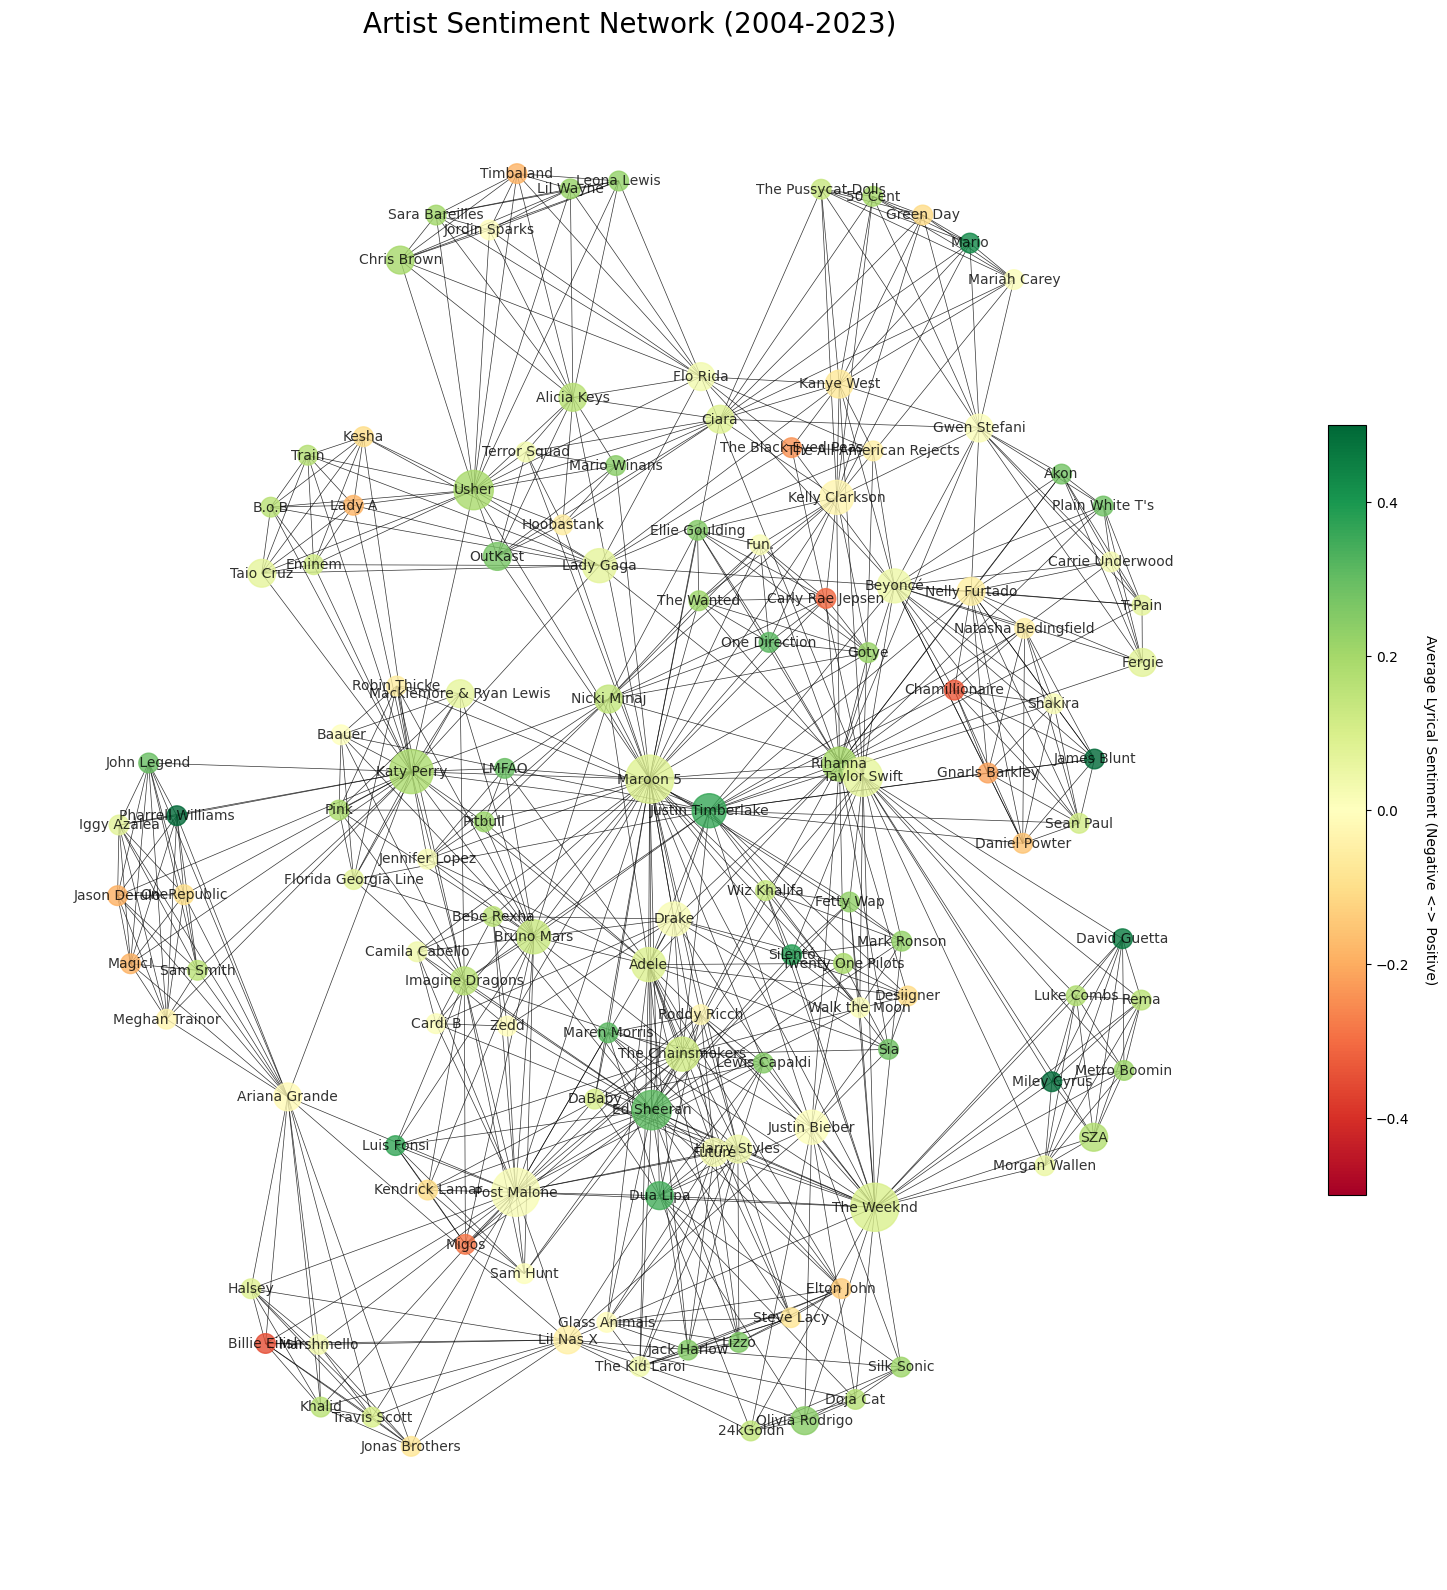

In [26]:
import lyricsgenius
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import networkx as nx  # Import the network library
import re
import sys
import time
from datetime import datetime
from itertools import combinations # To get pairs of artists

GENIUS_ACCESS_TOKEN = "IKoqZN1ANyU_2G6zmTPF2xlaH2OlIEEUlDoD97Mo9-P_A6-2QgnSoQlwsJ3Hy3DY"

import networkx as nx
# save dataframe as csv 7
df.to_csv('song_sentiments.csv', index=False)


# --- 4. AGGREGATE ARTIST DATA FOR NETWORK ---
print("\n--- Aggregating data for network analysis ---")
# Calculate each artist's average sentiment and number of hits
artist_stats = {}
for result in all_results:
    artist = result['artist']
    if artist not in artist_stats:
        artist_stats[artist] = {'sentiments': [], 'hit_count': 0}
    artist_stats[artist]['sentiments'].append(result['sentiment'])
    artist_stats[artist]['hit_count'] += 1

# Calculate the final average sentiment
for artist, data in artist_stats.items():
    data['avg_sentiment'] = sum(data['sentiments']) / len(data['sentiments'])


# --- 5. BUILD THE NETWORK ---
G = nx.Graph()

# Add nodes with attributes for sentiment and hit count
for artist, data in artist_stats.items():
    G.add_node(artist,
               sentiment=data['avg_sentiment'],
               hits=data['hit_count'])

# Add edges between artists who had hits in the same year
yearly_groups = df.groupby('year')['artist'].unique()
for year, artists in yearly_groups.items():
    # Get all pairs of artists in that year
    for artist1, artist2 in combinations(artists, 2):
        if G.has_edge(artist1, artist2):
            # Make edge thicker for each additional year of co-occurrence
            G[artist1][artist2]['weight'] += 1
        else:
            G.add_edge(artist1, artist2, weight=1)

print(f"Network created with {G.number_of_nodes()} artists and {G.number_of_edges()} connections.")

# --- 6. VISUALIZE THE ARTIST SENTIMENT NETWORK (Corrected Version) ---
print("\nGenerating network graph...")

# --- THIS IS THE FIX ---
# Step 1: Create a Figure and a single Axes object (the canvas)
fig, ax = plt.subplots(figsize=(20, 20))
# ---------------------

# Use a layout that spreads nodes out
pos = nx.kamada_kawai_layout(G)

# Get node attributes for visualization
sentiments = [data['sentiment'] for node, data in G.nodes(data=True)]
hits = [data['hits'] for node, data in G.nodes(data=True)]

# Set node sizes based on hit count (scaled for visibility)
node_sizes = [h * 200 for h in hits]

# Set node colors based on sentiment using a Red-Yellow-Green colormap
cmap = plt.cm.RdYlGn
norm = plt.Normalize(vmin=-0.5, vmax=0.5)
node_colors = [cmap(norm(s)) for s in sentiments]

# --- FIX CONTINUED ---
# Step 2: Tell nx.draw() to draw on our specific Axes, 'ax'
nx.draw(G, pos,
        ax=ax,  # <--- Pass the axes here
        with_labels=True,
        node_size=node_sizes,
        node_color=node_colors,
        width=0.5,
        alpha=0.8,
        font_size=10)
# ---------------------

# Add a colorbar to explain the sentiment colors
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# --- FIX CONTINUED ---
# Step 3: Tell plt.colorbar() which mappable to use and which Axes to steal from
cbar = plt.colorbar(sm, ax=ax, shrink=0.5) # <--- Pass the axes here
# ---------------------

cbar.set_label('Average Lyrical Sentiment (Negative <-> Positive)', rotation=270, labelpad=20)

# Set the title on the Axes object
ax.set_title('Artist Sentiment Network (2004-2023)', fontsize=20)

plt.show()

In [16]:
%reset

In [17]:
import lyricsgenius 
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import networkx as nx  # Import the network library
import re
import sys
import time
from datetime import datetime
from itertools import combinations # To get pairs of artists

GENIUS_ACCESS_TOKEN = "IKoqZN1ANyU_2G6zmTPF2xlaH2OlIEEUlDoD97Mo9-P_A6-2QgnSoQlwsJ3Hy3DY"

GENIUS_ACCESS_TOKEN = "IKoqZN1ANyU_2G6zmTPF2xlaH2OlIEEUlDoD97Mo9-P_A6-2QgnSoQlwsJ3Hy3DY"
print("Initializing Genius API...")
try:
    genius = lyricsgenius.Genius(GENIUS_ACCESS_TOKEN,
                                 # We will do our own cleaning to see the raw text
                                 remove_section_headers=False,
                                 timeout=15, 
                                 retries=3)
except Exception as e:
    print(f"Failed to initialize the Genius API: {e}")
    sys.exit()




# --- 3. MAIN SCRIPT LOGIC ---
target_song = "Blank Space"
target_artist = "Taylor Swift"

print(f"\nSearching for '{target_song}' by {target_artist}...")
try:
    song = genius.search_song(target_song, target_artist)
    print(song)
except Exception as e:
    print(f"An error occurred while searching for the song: {e}")


# --- 2. THE INSPECTION FUNCTION ---

"""Takes a lyricsgenius Song object and prints its data in a structured way."""
if not song:
    print("No song object provided.")
    # Exit if no song found
    sys.exit()
    

print("\n" + "="*50)
print("      INSPECTING SONG DATA: '{}'".format(song.title))
print("="*50 + "\n")

# --- Section 1: Top-Level Convenience Attributes ---
# --- Section 1: Top-Level Convenience Attributes ---
print("--- 1. Top-Level Attributes ---")
print(f"song.title:      {song.title}")
print(f"song.artist:     {song.artist}")
print(f"song.album:      {song.album.get('name', 'Not Found') if song.album else 'Not Found'}") # Safely get album name

# print all atributes:



Initializing Genius API...

Searching for 'Blank Space' by Taylor Swift...
Searching for "Blank Space" by Taylor Swift...
Done.
"Blank Space" by Taylor Swift:
    [Verse 1]
    Nice to meet you, where you been?
    I could show you incredible things
    Magic, madness, heave...

      INSPECTING SONG DATA: 'Blank Space'

--- 1. Top-Level Attributes ---
song.title:      Blank Space
song.artist:     Taylor Swift
song.album:      1989 (Deluxe)


In [18]:
import json
if song:
    print("\n--- All Song Attributes ---")
    for attr, value in vars(song).items():
        print(f"{attr}: {value}")

    print("\n--- Song as Dictionary ---")
    print(json.dumps(song.to_dict(), indent=2))



--- All Song Attributes ---
lyrics: [Verse 1]
Nice to meet you, where you been?
I could show you incredible things
Magic, madness, heaven, sin
Saw you there and I thought
"Oh, my God, look at that face
You look like my next mistake
Love's a game, wanna play?" Ayy
New money, suit and tie
I can read you like a magazine
Ain't it funny? Rumors fly
And I know you heard about me
So, hey, let's be friends
I'm dying to see how this one ends
Grab your passport and my hand
I can make the bad guys good for a weekend

[Chorus]
So it's gonna be forever
Or it's gonna go down in flames?
You can tell me when it's over, mm
If the high was worth the pain
Got a long list of ex-lovers
They'll tell you I'm insane
'Cause you know I love the players
And you love the game
'Cause we're young and we're reckless
We'll take this way too far
It'll leave you breathless, mm
Or with a nasty scar
Got a long list of ex-lovers
They'll tell you I'm insane
But I've got a blank space, baby
And I'll write your name

[Verse